In [1]:
import pandas as pd  #le package de manipulation de données le plus populaire en Python
from bs4 import BeautifulSoup  #Beautiful Soup est une bibliothèque qui facilite le grattage d’informations à partir de pages Web
import urllib.request #module Python permettant d’extraire des URL
import csv #Le module csv nous permet de lire chacune des lignes du fichier en utilisant une virgule comme délimiteur
import tweepy as tw # télécharger vos tweets de
import time
import json
import nltk
import re

import numpy as np #aider à  obtenir la couleur de l'image
import matplotlib.pyplot as plt
import seaborn as sns #Pour le graphisme

import matplotlib.pyplot as plt
import matplotlib as mpl  #utiliser pour afficher dessiner des graphiques
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # importer des mots et va genere de couleurs d'image
from PIL import Image

In [3]:
#Recuperer mes keys pour les utiliser
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth)


In [4]:
def twitter_requete(search_key,csv_name):
    
    #search_key = "the Art of War"
    #search_key = 'The song of Achille'
    #search_key = "The Book Thief"
    #search_key = "the picture of Dorian gray"
    

    csvFile = open(csv_name, "a+",newline="",encoding="utf-8")
    csvWriter = csv.writer(csvFile) 
    print(csv.writer)

    c = []
    u = []
    t = []

    #i = []  ,until="2021-07-10"  text_full.encode("utf-8").strip('@') lang="id"

    for tweet in tw.Cursor(api.search,q=search_key,since="2021-01-01",count=1000).items():
        print(tweet.created_at, tweet.id, tweet.user.name, tweet.text)
        c.append(tweet.created_at)
        #i.append(tweet.id)
        u.append(tweet.user.name)
        t.append(tweet.text.encode("utf-8"))

        tweets=[tweet.created_at, tweet.id, tweet.user.name, tweet.text.encode("utf-8")]
        csvWriter.writerow(tweets)

        #dictTweets = {"time":c, "identifiant":i, "users":u, "tweets":t }
        dictTweets = {"time":c, "users":u, "tweets_col":t }



    bdd = pd.DataFrame(dictTweets, columns=["time","users","tweets_col"])
    
    
    return bdd
  

In [5]:
def cleaning(bdd):

    #SUPPRIMER TOUS LES DOUBLONS DE LA COLONNE 'TWEETS'
    bdd = bdd.drop_duplicates(subset=['tweets_col'])

    #SUPPRIMER TOUS LES '@'
    bdd.tweets_col = bdd['tweets_col'].astype(str).str.replace('@', '')
    #SUPPRIMER TOUS LES 'b'
    bdd.tweets_col = bdd['tweets_col'].str.strip('b')
    #SUPPRIMER TOUS LES 'RT'
    bdd.tweets_col = bdd.tweets_col.str.replace('RT', '')
    #SUPPRIMER LES LIENS
    def remove_punct(text):
        text = re.sub("(@[A-Za-z0–9]+)|[^\w\s]|#|http\S+","", text)
        return text

    bdd['tweets_col'] =bdd['tweets_col'].apply(lambda x: remove_punct(x))
    #AFFICHER LE DATAFRAME (TABLEAU) NETTOYES
    
    return bdd


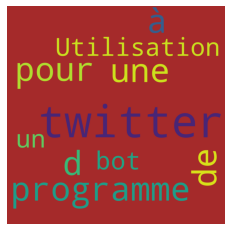

In [6]:
#Le but facilité la comprehension d'1 texte en identifiant les idées principales
text= 'Utilisation d’un bot : Permet d’enregistre des twitter même si la personne efface. C’est grâce à twitter de son API Twitter (une porte ouverte pour les programmes une fonctionnalité que Twitter nous donne à distance pour nos programme'
wordcloud= WordCloud(max_words =10, stopwords= STOPWORDS, background_color='brown', width=2021, height=2021).generate(text)

plt.imshow(wordcloud)
plt.axis('off') #Eviter que les axes soient voyant
plt.show()


In [ ]:
def visualisation(bdd):
    #CREER UNE LISTE DE LA TOTALITE DES TWEETS MOT PAR MOT
    #saDataFrame[saDataFrame.ColonneTest.].colonneDesTweets
    text = bdd[bdd.time=='2021'].tweets_col.tolist() 

    #METTRE TOUS LES MOTS EN MINUSCULE
    text = ''.join(str(text)).lower()

    #CODE POUR LE NUAGE DE MOTS
    wordcloud = WordCloud(stopwords = STOPWORDS,collocations=True).generate(text)

    #AFFICHER LE NUAGE DE MOTS
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilInear')
    plt.axis('off')
    plt.show()
    
    return bdd



In [ ]:
#Appeler à ma fonction en passant en parametre le livres
bdd=twitter_requete('"the art of war"', 'the_art_of_war.csv')
print(bdd)

In [ ]:
#Appel de fonction nettoyage
cleaning(bdd)

In [ ]:
#NECESSAIRE POUR CREER LE "NUAGE DE MOT"
bdd['time'] = '2021'
bdd

In [ ]:
#Appeler de ma fonction
visualisation(bdd)

In [ ]:
#Appeler à ma fonction 
bdd=twitter_requete('"The song of Achille"', 'The_song_of_Achille.csv')
print(t)

In [ ]:
#Appel de fonction nettoyage
cleaning(bdd)

In [ ]:
#NECESSAIRE POUR CREER LE "NUAGE DE MOT"
bdd['time'] = '2021'
bdd

In [ ]:
#Appeler de ma fonction
visualisation(bdd)

In [ ]:
#Appeler à ma fonction 
bdd=twitter_requete('"The Book Thief"', 'The_Book_Thief.csv')
#print(t)

In [ ]:
#NECESSAIRE POUR CREER LE "NUAGE DE MOT"
bdd['time'] = '2021'
bdd

In [ ]:
#Appel de fonction nettoyage
cleaning(bdd)

In [ ]:
#Appeler de ma fonction
visualisation(bdd)

In [ ]:
bdd=twitter_requete('"The Book Thief"', 'The_Book_Thief.csv')
print(t)

In [ ]:
#NECESSAIRE POUR CREER LE "NUAGE DE MOT"
bdd['time'] = '2021'
bdd

In [ ]:
#Appel de fonction nettoyage
cleaning(bdd)

In [ ]:
#Appeler de ma fonction
visualisation(bdd)

In [ ]:
bdd=twitter_requete('"the picture of Dorian gray"', 'the_picture_of_Dorian_gray.csv')
print(t)

In [ ]:
#NECESSAIRE POUR CREER LE "NUAGE DE MOT"
bdd['time'] = '2021'
bdd

In [ ]:
#Appel de fonction nettoyage
cleaning(bdd)

In [ ]:
#Appeler de ma fonction
visualisation(bdd)

In [ ]:
#CREATION D'UN TABLEAU FREQUENCE/TRIGRAMMES
from sklearn.feature_extraction.text import CountVectorizer

#ngram_range= (2,2)Pour les bigrammes, (2,3)Pour les bigrammes et trigrammes, (3,3)Pour les trigrammes
c_vec = CountVectorizer(ngram_range=(3,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(bdd['tweets_col'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})
df_ngram.head(25)

In [ ]:
#GENERATION DES BIGRAMMES
text = bdd[bdd.time=='2021'].tweets_col.tolist()
text2 = [[Word for Word in line.split()] for line in text]
bigrams = nltk.bigrams(text2)
print(bigrams)